# E-News Express Project

## Introduction
E-News Express is an online news portal. The company has hired me as a Data Scientist to analyze the new landing page that the design team has created to attract new subscribers, and to analyze if the new landing page is more effective than the old one.

## Objective 
To analyze the subscribers interests and determine whether the new landing page will be effective or not in attracting new subscribers.

## Key Questions/Actions:
1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page? 
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? 
5. Is the mean time spent on the new page same for the different language users?
6. What conclusions do the tests lead to? 
7. What reservations we have about the result?
8. Level of Significance = 0.05.

## Data Dictionary:
1. user_id: represents the user ID of the person visiting the landing page.
2. group: represents whether the user belongs to the first group (control) or the second group (treatment). 
3. landing_page: represents whether the landing page is new or old.
4. time_spent_on_the_page: represents the time (in minutes) spent bythe user on the landing page.
5. converted: represents whether the user gets converted or not.
6. language_preferred: represents the language chose by the user to view landing page 

In [2]:
# import numpy to perform complex algebra functions
# import pandas to import csv file
# import matplotlib to make changes to figures
# import seaborn to add high level features to graphs
# %matplotlin inline enables python to plot graphs
# import scipy to perform high level statistics functions
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) # adds background to graphs
import scipy.stats as stats

### Import/Read Dataset

In [3]:
# get original csv file, including index, rows and columns
orig_df = pd.read_csv ('abtest.csv')
orig_df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [4]:
# make copy of original csv file to avoid making changes to the original datafram
copy_df= orig_df.copy()
copy_df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


### Preliminary Data Analysis

In [5]:
# Checking top 10 rows
copy_df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


In [6]:
copy_df.shape

(100, 6)

- Dataset has 100 rows and 6 columns

In [7]:
# check for missing values in all columns
copy_df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [8]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


##### Observations
- There are no missing values in the data frame
- We need to normalize Datatypes in columns group, landing_page, converted, language_preferred are Dtype ='object' when Dtype should be = 'category' for memory eficiency purposes. 

In [9]:
copy_df['group'] = copy_df.group.astype('category')
copy_df['landing_page'] = copy_df.landing_page.astype('category')
copy_df['converted'] = copy_df.converted.astype('category')
copy_df['language_preferred'] = copy_df.language_preferred.astype('category')

In [10]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.5 KB


In [11]:
copy_df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,treatment,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,55,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [12]:
# Analyze the mean time spent on the page from each group
copy_df.groupby('group')['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30
treatment,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71


In [158]:
# Analyze the frequency in which each group converts to subscribers
copy_df.groupby('group')['convert'].describe()

,count,unique,top,freq
group,,,,
control,50,2,no,27
treatment,50,2,yes,32


##### Observations
- Most users speak Spanish.
- The average time users spend on the website is 2.377 minutes.
- The min time users spend on the website is 0.19 minutes.
- The max time users spend on the website is 10.71 minutes.
- The mean time spent from group control is 4.53 minutes.
- The mean time spent from group treatment is 6.22 minutes. 
- Out of the 50 users in the control group 27 are NOT converting to subscribers.
- Out of the 50 users in the treatment group 32 are converting to subscribers.

## EDA
### Univariate Graph Analysis

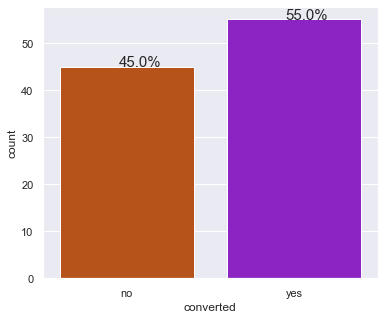

In [14]:
#Analysis for converted
#Function to annotate the percentage for data in x-axis
def var_perc (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x=p.get_x() + p.get_width()/2-0.05
        y=p.get_y() + p.get_height()
        ax.annotate(percentage, (x,y), size =15)
        
plt.figure(figsize=(6,5))
ax = sns.countplot(copy_df['converted'], palette="gnuplot_r");
var_perc(ax, copy_df['converted']);

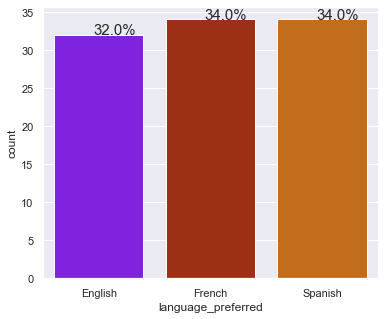

In [15]:
#Analysis for language preferred
plt.figure(figsize=(6,5))
ax = sns.countplot(copy_df['language_preferred'], palette="gnuplot");
var_perc(ax, copy_df['language_preferred'])

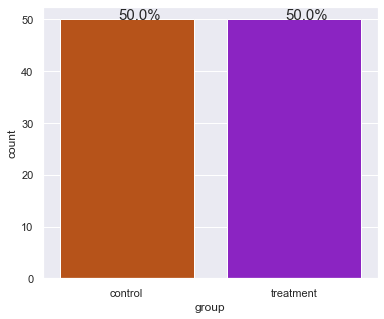

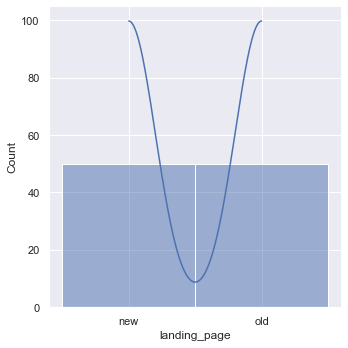

In [16]:
#Analysis for group and landing page
plt.figure(figsize=(6,5))
ax = sns.countplot(copy_df['group'], palette="gnuplot_r")
var_perc(ax, copy_df['group'])

sns.displot(copy_df['landing_page'], kde=True);

##### Obervations
- 55% of users from both groups are converting to subscribers to the channel.
- 34% of the users from both groups speak French.
- 34% of the users from both groups speak Spanish.
- Spanish and French are the preferred languages.
- As specified the users in group column are 50% control and 50% treatment.
- As specified the users in landing_page column are also 50 users new and 50 users old.

### Bivariate Graph Analysis

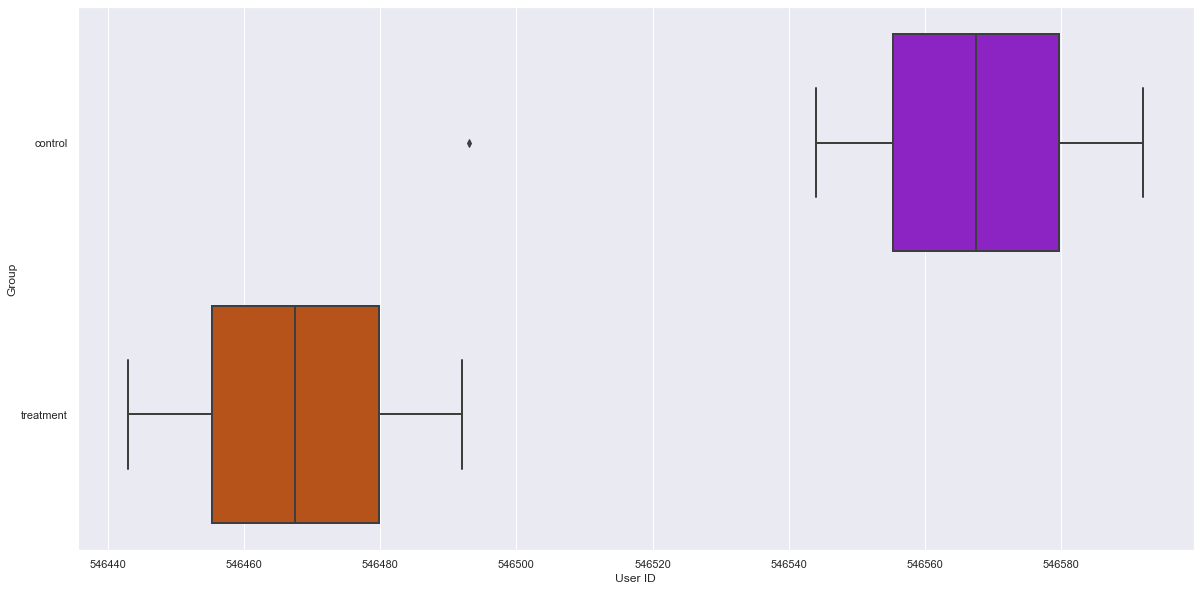

In [17]:
# Analysis between landing page and converted
plt.figure(figsize=(20,10))
sns.boxplot(copy_df['user_id'], copy_df['group'], linewidth=2, palette='gnuplot');
plt.xlabel('User ID');
plt.ylabel('Group');

##### Observations
- Users with ID numbers between 546440 and 546490 belong to the treatment group. 
- Users with ID numbers between 546540 and 546590 belong to the control group. 

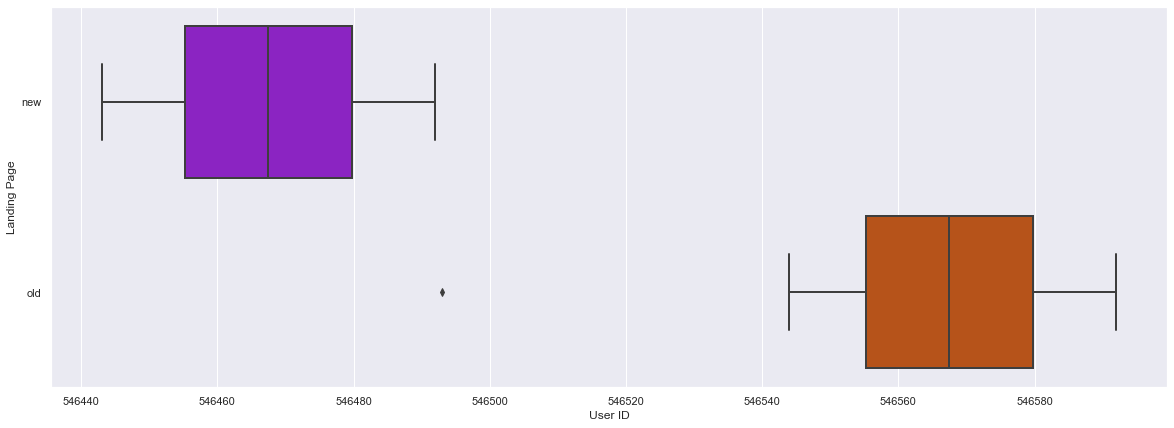

In [18]:
# Analysis between user_id and landing_page
plt.figure(figsize=(20, 7))
sns.boxplot(copy_df['user_id'], copy_df['landing_page'], linewidth=2, palette='gnuplot');
plt.xlabel('User ID');
plt.ylabel('Landing Page');

##### Observations
- Users with ID between 546440 and 546490 (belong to the treatment group) and are using the new landing page.
- Users with ID between 546540 and 546590 (belong to the control group) and are using the old landing page.

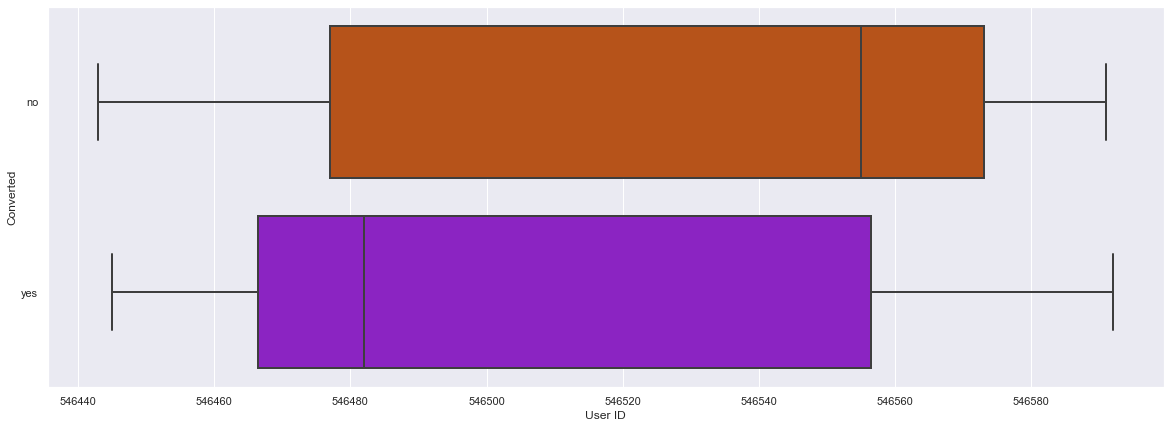

In [19]:
# Analysis between user_id and converted
plt.figure(figsize=(20, 7))
sns.boxplot(copy_df['user_id'], copy_df['converted'], linewidth=2, palette='gnuplot_r');
plt.xlabel('User ID');
plt.ylabel('Converted');

##### Observations
- Users with ID between 546465 and 546559 belong mostly to the treatment group using the new landing page, the graph reflects they are converting to usbscribers.
- Users with ID between 546480 and 546590 belong mostly to the control group using the old landing page, the graph reflects they are not converting to subscribers. 

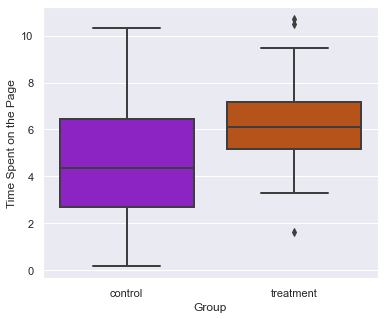

In [20]:
# Analysis between group and time_spent_on_the_page 
plt.figure(figsize=(6, 5))
sns.boxplot(copy_df['group'], copy_df['time_spent_on_the_page'], linewidth=2, palette='gnuplot');
plt.xlabel('Group');
plt.ylabel('Time Spent on the Page');

##### Observations
- The median for group control is at around 4.5 minutes.
- The median for group treatment is at around 6.2 minutes.
- The median for group treatment is higher than the median for group control.
- Users in the treatment group are spending more time in the new landing page.

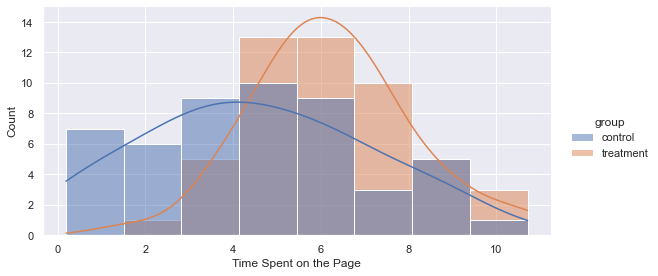

In [21]:
# Analysis fon control and treatment group's Density
abtest = copy_df
sns.displot(data=abtest, x="time_spent_on_the_page", hue="group", kde=True, height=4, aspect=2);
plt.xlabel('Time Spent on the Page');

##### Obervations
- Users are spending more time on the new landing page (treatment group).
- The control group’s distribution is skewed to the left. 
- The treatment group’s distribution is skewed slightly to the right.

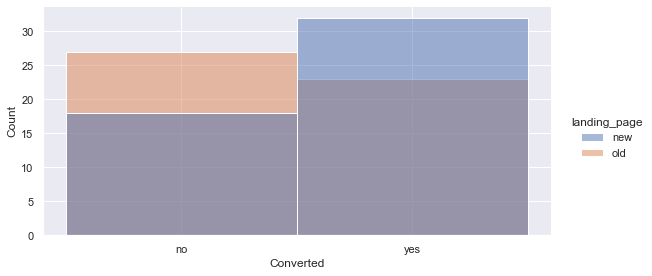

In [159]:
# Analysis for converted and landing_page
abtest = copy_df
sns.displot(data=abtest, x="converted", hue="landing_page", kde=False, height=4, aspect=2);
plt.xlabel('Converted');

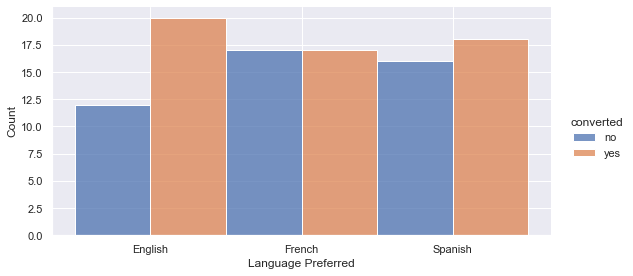

In [82]:
# Analysis for language_preferred and converted
abtest = copy_df
ax = sns.displot(data=abtest, x="language_preferred", hue="converted", multiple="dodge", 
            kde=False, height=4, aspect=2);
plt.xlabel('Language Preferred');

##### Observations
- Users that speak English is the largest group converting to subscribers. Followed by users that speak Spanish.
- Users that speak French have the lowest conversion rate relative to other language users. 

### Multi-Variate Graph Analysis

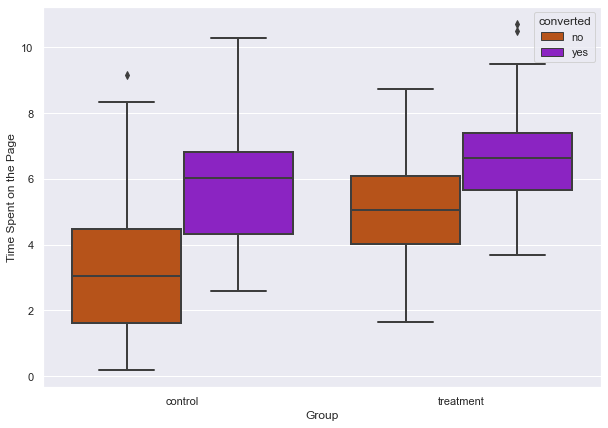

In [23]:
# Analysis for time_spent_on_the_page/group/converted
plt.figure(figsize=(10,7))
sns.boxplot(copy_df['group'], copy_df['time_spent_on_the_page'], copy_df['converted'], linewidth=2, palette='gnuplot_r');
plt.xlabel('Group');
plt.ylabel('Time Spent on the Page');

##### Observations
- Users in the control group that were not converted into subsribers have the lowest median.
- Most users in the control group that were converted into subscribers spent between 4.3 and 6.5 minutes on the old landing page.
- The control group has a lower median and more variability in their mean values. 
- The treatment group has the highest median, and less variability in their mean values.  

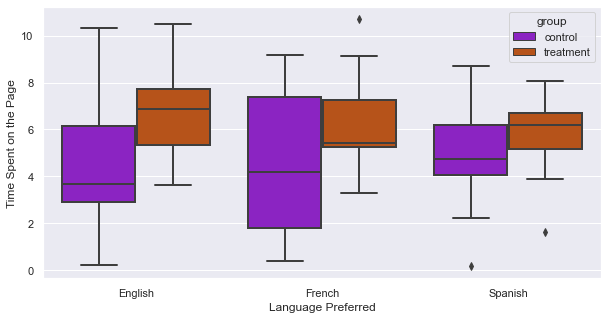

In [24]:
# Analysis between time_spent_on_the_page/language_preferred/group
plt.figure(figsize=(10,5))
sns.boxplot(copy_df['language_preferred'], copy_df['time_spent_on_the_page'], copy_df['group'], linewidth=2, palette='gnuplot');
plt.xlabel('Language Preferred');
plt.ylabel('Time Spent on the Page');

##### Obervations
- The median for control group and English speaking users is the lowest amongst all languages.
- The median for treatment group and English speaking users is the highest amongst all languages.
- Users that speak English that are part of treatment group are spending the most time on the new landing page.

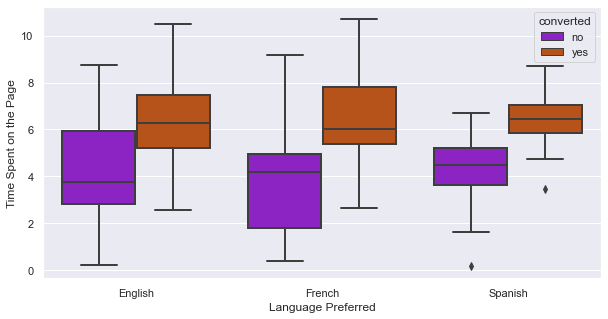

In [162]:
# Analysis between time_spent_on_the_page/language_preferred/converted
plt.figure(figsize=(10,5)) 
sns.boxplot(copy_df['language_preferred'], copy_df['time_spent_on_the_page'], copy_df['converted'], linewidth=2, palette='gnuplot'); plt.xlabel('Language Preferred');
plt.ylabel('Time Spent on the Page');

##### Observations
- Users that did not convert to subscribers have the lowest median between all preferred languages.
- Users that speak English and did not convert to subscribers have the lowest median across all values.
- Users that speak Spanish and converted to subscribers have the highest median of aproximately 6.4 minutes spent on the landing page.


### Two Independent Sample T-Test 
### Users spend more time on the new or old landing page?
#### Null and Alternate Hypothesis Definition
Let $\mu_1, \mu_2$, be the mean (average) time users spend on the old landing page and the new landing page respectively.

$\mu_1$= old landing page.

$\mu_2$= new landing page.

The null hypothesis
>$H_0:\mu_1 = \mu_2$

The alternate hypothesis
>$H_a:\mu_1<\mu_2$

In [26]:
# Quick look on the sample data
abtest=pd.read_csv('abtest.csv')
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [27]:
#find the sample mean and sample standard deviation for time_spent_on_the_page
print('The mean time spent on the page is '+ str(abtest['time_spent_on_the_page'].mean()))
print('The standard deviation for time spent on the page is ' + str(abtest['time_spent_on_the_page'].std()))

The mean time spent on the page is 5.377800000000002
The standard deviation for time spent on the page is 2.378166078933492


#### Test whether the T-Test assumptions are satisfied or not
- Continuous data - yes, the time spent on the page is measured in a continuous scale.
- Normally distributed populations - the treatment group is normally distributed.
- Independent populations - we were given random samples for the two groups, the two samples are from two independent populations.
- Unequal population standard deviations - unknown std for each group. The population standard deviations may be assumed to be different.
- Random sampling from the population - yes, the collected sample was chosen from a random sample.

We can user T-Test for this problem.

### Finding the p-value

In [28]:
# import scipy function for T-Test
from scipy.stats import ttest_ind

a= abtest['time_spent_on_the_page']
b= abtest['user_id']
t_stat, p_value = ttest_ind(a, b, equal_var=False, alternative='less')

print('The calculated t-statistic is: ' + str(t_stat))
print('The p-value is: ' +str(p_value))

#copy_df.groupby('group')['time_spent_on_the_page'].describe()

The calculated t-statistic is: -104396.074690387
The p-value is: 0.0


##### Obervation
- As the p-value (~0.0001) is less than the level of significance (0.05), we can reject the null hypothesis. Therefore, we can reject the null hypothesis and claim the mean time users spent on the new landing page is greater than the time users spent on the old landing page.

### Two Proportion Z-Test
### What conversion rate is greater? for the new or the old landing page
#### Null and Alternative Hypothesis Definition
Let $p_1, p_2$ be the proportions of users who visit the landing page and get converted to subscribers on the old landing page and new landing page respectively.

$p_1$= old landing page.

$p_2$= new landing page.

Null Hypothesis
>$H_0:p_1 \geq p_2$

Alternate Hypothesis
>$H_a:p_1 <p_2$


#### Test whether the Z-Test assumptions are satisfied or not
- Binomally distributed population - Yes, the users are testing either the new landing page or the old landing page.
- Random sampling from population - Yes, it is confirmed the two groups selected are a simple random sample.
- Can the binomial distribution approximated to normal distribution - Yes 
>$np_1 = 23\cdot \frac{50}{23} =50 \geq 10\\
n(1-p_1) = 23 \cdot \frac{23-50}{23} =479 \geq 10 \\
np_2 = 32\cdot \frac{50}{32} =50 \geq 10\\
n(1-p_2) = 32 \cdot \frac{32-50}{32} =974 \geq 10 $

### Finding the p-value

In [29]:
# import function for proportions Z-Test
from statsmodels.stats.proportion import proportions_ztest

# set the counts for conversions for old landind page and new landing page
conv_count= np.array([23,32])

# set the sample sizes
nobs = np.array([50, 50])

# find p-value
t_stat, p_value = proportions_ztest(conv_count, nobs)
print('The calculated t-statistic is: ' + str(t_stat))
print('The p-value is: ' + str(p_value))

The calculated t-statistic is: -1.8090680674665816
The p-value is: 0.07044042927208799


##### Observations
- As the p-value (0.0704) is greater than the level of significance (0.05), we can not reject the null hypothesis. Therefore, we do not have enough statistical significance to conclude that the old page has less conversions than the new.

### Chi-Square Test for Independence
### Does the converted status depend on the preferred language?
#### Null and Alternative Hypothesis

Null Hypothesis
>$H_0:$ = The conversion rate is independent on the preferred language.

Against the alternate Hypothesis
>$H_a:$ The converstion rate depends on the preferred language.


#### Test whether the assumptions are satisfied or not
- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the total of rows*columns is greater than 5.
- Random sampling from the population - Yes, it is confirmed the two groups selected are a simple random sample.

In [59]:
# Analysis to see all converted and preferred language users
all_data = pd.crosstab(abtest['converted'], abtest['language_preferred']) 
all_data

language_preferred,English,French,Spanish
converted,,,
no,12,17,16
yes,20,17,18


In [163]:
# Analysis to see especifically which group converted based on preferred language with total
group_data_total = pd.crosstab(abtest.language_preferred,[abtest.converted, abtest.group], margins=True, margins_name="Total")

group_data_total

converted               no               yes           Total
group              control treatment control treatment      
language_preferred                                          
English                  5         7      11         9    32
French                  13         4       4        13    34
Spanish                  9         7       8        10    34
Total                   27        18      23        32   100

In [94]:
# Analysis to see especifically which group converted based on preferred language
group_data = pd.crosstab(abtest.language_preferred,[abtest.converted, abtest.group])
group_data

converted               no               yes          
group              control treatment control treatment
language_preferred                                    
English                  5         7      11         9
French                  13         4       4        13
Spanish                  9         7       8        10

### Finding the p-value

In [95]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value for all_data
chi, p_value, dof, expected = chi2_contingency(all_data)
print('The p-value for all_data is', p_value)

The p-value for all_data is 0.5686624745121615


In [89]:
# find the p-value for group_data
chi, p_value, dof, expected = chi2_contingency(group_data)
print('The p-value for group_data is ', p_value) 

The p-value for group_data is  0.19992065895813813


##### Observations
- The p-value for all_data (the converted ratio for preferred language) is greater (0.568) than the level of significance (0.05). Therefore, we fail to reject the null hypothesis. We do not have enough evidence to say that the conversion rate depends on the preferred language. 
- The p-value for group_data (the converted ratio for users in both groups treatment and control, the value we are selecting) is greater (0.199) than the level of significance (0.05). Therefore, we fail to reject the null hypothesis. We do not have enought evidence to say that the conversion rate depends on the preferred language. 

### One-Way Anova F-Test
### Is the mean time spent on the new page same for the different language users?
Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on either the new or the old page, for the preferred language English, French and Spanish respectively.

$\mu_1$ = English
$\mu_2$ = French
$\mu_3$ = Spanish

Null Hypothesis
>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative Hypothesis
>$H_a:$ At least one mean time spent either the new page or the old page, is different from the rest

In [126]:
# get the value counts for language_preferred
abtest.groupby("group")['language_preferred'].value_counts()

group      language_preferred
control    French                17
           Spanish               17
           English               16
treatment  French                17
           Spanish               17
           English               16
Name: language_preferred, dtype: int64

In [131]:
# mean of time spent on page x depending on language_preferred
print(abtest.groupby("language_preferred")["group","time_spent_on_the_page"].mean())

                    time_spent_on_the_page
language_preferred                        
English                           5.559063
French                            5.253235
Spanish                           5.331765


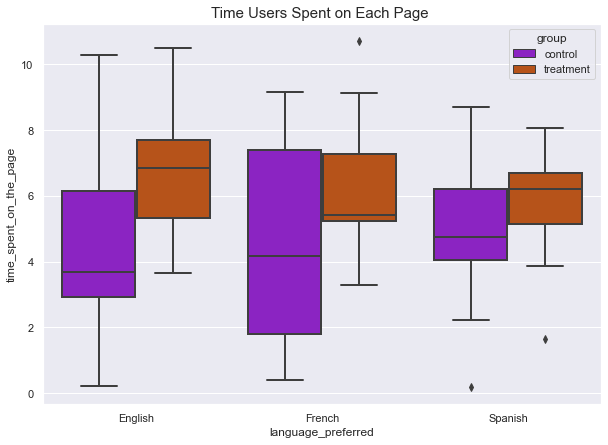

In [114]:
plt.subplots(figsize=(10,7))
ax = sns.boxplot(x="language_preferred", y="time_spent_on_the_page", data=abtest,
           hue= 'group', linewidth=2, palette='gnuplot')
ax.set_title ("Time Users Spent on Each Page ", fontsize=15)
plt.show()

##### New Observations
- For testing of normality, Shapiro-Wilk's test is applied to the response variable
- For equiality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk's Test
Null Hypothesis 
>$H_0:$ time spent on a page follows a normal distribution against

Alternative Hypothesis
>$H_a:$ time spent on a page does not follow a normal distribution

In [133]:
# Assumtion 1: Normality
# find the p-value

w, p_value = stats.shapiro(abtest['time_spent_on_the_page'])
print('The p-value for Shapiro-Wilk Test is: ', p_value)

The p-value for Shapiro-Wilk Test is:  0.5643684267997742


##### Obervations
- The p-value (0.564) is greater than the level of significance (0.05). Therefore, we fail to reject the null hypothesis and claim that the time spent on a page does not follow a normal distribution.

### Lavene's Test
Null Hypothesis
>$H_0:$ All the population variances are equal

Alternative Hypothesis
>$H_a:$ At least one variance is different from the rest

In [142]:
# Assumption 2: Homogenity of Variance
# import the Levene function
from scipy.stats import levene
statistic, p_value = levene(abtest['time_spent_on_the_page'][abtest['language_preferred'] =="English"],
                           abtest['time_spent_on_the_page'][abtest['language_preferred'] == "French"], 
                           abtest['time_spent_on_the_page'][abtest['language_preferred'] == "Spanish"])
# find the p-value
print("The p-value for Levene Test is: ", p_value)

The p-value for Levene Test is:  0.06515086840327314


##### Obervations
- The p-value (0.065) is greater than the level of significance (0.05). Therefore, we fail to reject the null hypothesis and claim that at least one variance is different from the rest.

### Finding the p-value

In [145]:
# import the required function
from scipy.stats import f_oneway

# one-way anova test
t_stat, p_value = f_oneway(abtest.loc[abtest['language_preferred'] == 'English', 'time_spent_on_the_page'],
                          abtest.loc[abtest['language_preferred'] == 'French', 'time_spent_on_the_page'],
                          abtest.loc[abtest['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value for ANOVA Test is: ', p_value)

The p-value for ANOVA Test is:  0.8665610536012648


##### Observations
- The p-value is greater (0.866) than the level of significance (0.05). Therefore, we cannot reject the null hypothesis. We do not have enough evidence to reject the null hypothesis. We do not have enough statistical significance to conclude that at least one mean time is different for a preferred language at a 0.05 significance level.

### Multiple Comparison Test (Tukey HSD)
in order to identify which preferred language mean is different from the other preferred languages

Null Hypothesis
>$H_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

Alternative Hypothesis
>$H_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$


In [153]:
# import the required functions
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
mult_comp = pairwise_tukeyhsd(endog = abtest['time_spent_on_the_page'], groups = abtest['language_preferred'],
                              alpha = 0.05)
print(mult_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


##### Observations
- Confirming that the p-value for the pair English-French, English-Spanish, French-Spanish is greater than the level of significance (0.05). The null hypothesis cannot be rejected. We do not have enough statistical significance to conclude that at least one preferred language is different from the rest at 0.05 significance level.

## Conclusion

-As the p-value (~0.0001) is less than the level of significance (0.05). Therefore, we can reject the null hypothesis and claim the mean time users spent on the new landing page is greater than the time users spent on the old landing page.

-As the p-value is greater than the level of significance (0.05), we can not reject the null hypothesis. Therefore, we do not have enough statistical significance to conclude that the old page has less conversions than the new.

-The p-value for all_data (the converted ratio for preferred language) is greater (0.568) than the level of significance (0.05). Therefore, we fail to reject the null hypothesis. We do not have enough evidence to say that the conversion rate depends on the preferred language.

-The p-value for group_data (the converted ratio for users in both groups treatment and control, the value we are selecting) is greater (0.199) than the level of significance (0.05). Therefore, we fail to reject the null hypothesis. We do not have enought evidence to say that the conversion rate depends on the preferred language. This is the value taking into consideration for our final conclusion.

-The p-value is greater (0.866) than the level of significance (0.05). Therefore, we cannot reject the null hypothesis. We do not have enough evidence to reject the null hypothesis. We do not have enough statistical significance to conclude that at least one preferred language is different from the rest at 0.05 significance level.

-Users are spending more time on the new landing page instead of the old landing page.

-We do not have enough statistical data to determine if the conversion rate is greater.
Need a bigger sample of users.

-We do not have enough statistical data to determine if the user converted based on the user's preferred language. Need a bigger sample of users.

## Reservations

We do not have enough statistical significance to conclude that at least one preferred language is different from the rest at 0.05 significance level. We need a bigger sample space, or a different level of significance to confirm our hypothesis for the means in language preferred. 